## **UCI WINE DATASET**
- These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

- The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 

## **Import Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print("Columns : ",df.shape[1])
print("Rows : ", df.shape[0])

Columns :  14
Rows :  178


In [4]:
print("Columns Name     :  No. of Null values in each column")
print("-----------------------------------------------------")
df.isnull().sum()

Columns Name     :  No. of Null values in each column
-----------------------------------------------------


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [5]:
for i in df.columns:
    print("Column Name : ", i)
    print(df[i].unique())
    print("=======================================================================")
    print()

Column Name :  Wine
[1 2 3]

Column Name :  Alcohol
[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]

Column Name :  Malic.acid
[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## **Data Visualisation**

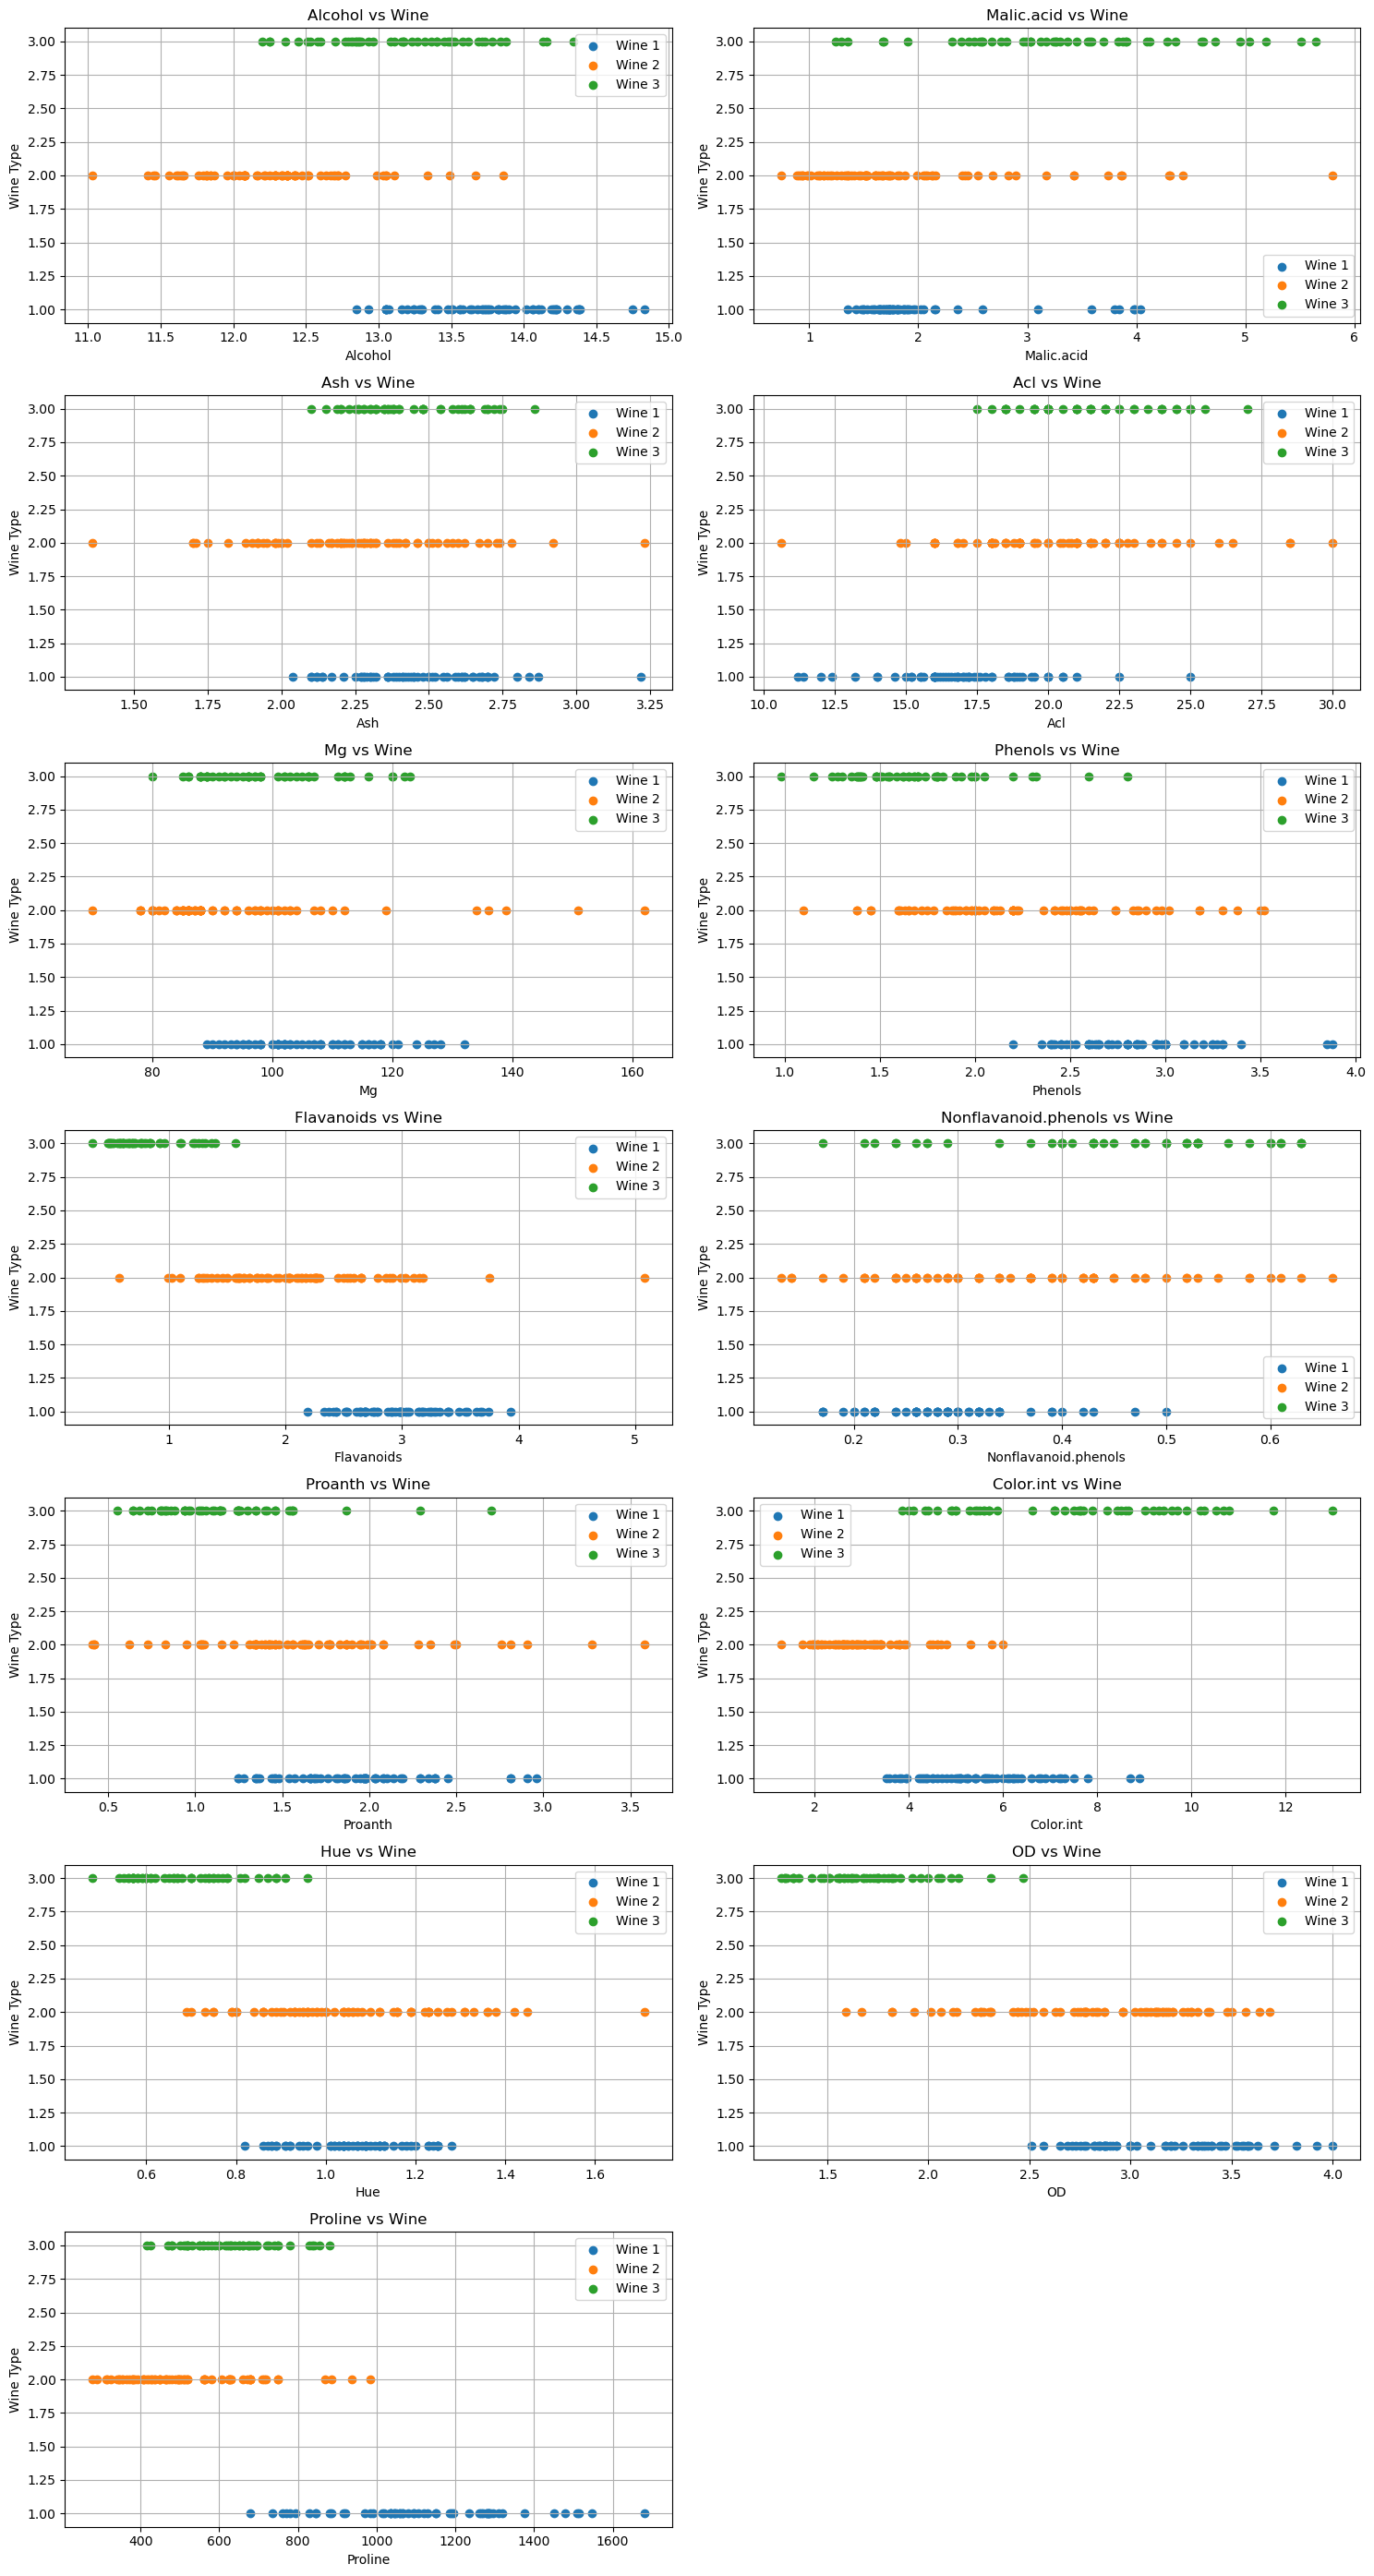

In [7]:
# Excluding 'Wine' (column 0) from features
features = df.columns[1:]

# Defining number of rows and columns for subplots
n_cols = 2
n_rows = -(-len(features) // n_cols)  # Ceiling division

# Creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Ploting each feature against Wine type
for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Ploting each wine type in different color
    for wine_type in sorted(df["Wine"].unique()):
        subset = df[df["Wine"] == wine_type]
        
        # Sorting by feature for better line plotting
        sorted_subset = subset.sort_values(by=feature)
        
        ax.scatter(sorted_subset[feature], [wine_type]*len(sorted_subset), label=f'Wine {wine_type}')

    
    ax.set_title(f'{feature} vs Wine')
    ax.set_xlabel(feature)
    ax.set_ylabel('Wine Type')
    ax.legend()
    ax.grid(True)

# Hiding any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjusting layout
plt.tight_layout()
plt.show()


## **Train - Test Split**

In [8]:
# Independent Variable
x = df.drop(columns = ["Wine"])

# Dependent Variable
y = df["Wine"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
print("x_train size : ", x_train.shape)
print("x_test size : ", x_test.shape)
print("y_train size : ", y_train.shape)
print("y_test size : ", y_test.shape)

x_train size :  (142, 13)
x_test size :  (36, 13)
y_train size :  (142,)
y_test size :  (36,)


## **Model Building**

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=10)

In [13]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [14]:
y_pred = model.predict(x_test)

In [15]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [17]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Best Cross-Validation Accuracy: 0.9857142857142858

Classification Report on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      0.93      0.93        14
           3       0.88      0.88      0.88         8

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36



In [18]:
accuracy_score(y_pred,y_test)

0.9444444444444444

### 📊 What's Happening?

We are seeing:

* ✅ **Normal RandomForestClassifier** (default or manually set):
  → **Test Accuracy = 1.0**

* ⚙️ **GridSearchCV-optimized model**:
  → **Test Accuracy = 0.9444 (94.44%)**

---

### 🔍 Interpretation:

| Metric                 | Normal Model  | GridSearchCV Model |
| ---------------------- | ------------- | ------------------ |
| Test Accuracy          | **1.0**       | **0.9444**         |
| Cross-Validation Score | Unknown       | Reliable (used CV) |
| Model Complexity       | Possibly high | Controlled         |
| Generalization Risk    | ⚠️ High       | ✅ Better           |

---

### ✅ **Conclusion**:

* **Normal model is likely overfitting**:
  It memorized the small training dataset and is doing **too well** on the test set.

* **GridSearchCV model generalizes better**:
  Slightly lower test accuracy, but it’s **more robust and trustworthy** due to cross-validation and controlled complexity.